<a href="https://colab.research.google.com/github/aryana64/biocad_intro/blob/main/biocode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model 
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor
!pip install catboost
from catboost import CatBoostRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/monitoringanaliz.zip" -d "/content/drive/MyDrive/Colab Notebooks/biocad"

Archive:  /content/drive/MyDrive/Colab Notebooks/monitoringanaliz.zip
replace /content/drive/MyDrive/Colab Notebooks/biocad/monitoringanaliz/X_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
x_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/biocad/monitoringanaliz/X_test.csv')
x_train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/biocad/monitoringanaliz/X_train.csv')
y_train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/biocad/monitoringanaliz/Y_train.csv')

In [ ]:
x_train.head()

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Oxygen in percent in off-gas(O2:O2 (%)),Offline Penicillin concentration(P_offline:P(g L^{-1})),Offline Biomass concentratio(X_offline:X(g L^{-1})),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref)
0,0.2,30,100,8,0.0000,30.118,9.8335,0.0001,0,0.6,...,0.19595,NaN,NaN,0.034045,0,NaN,0,1,1,1
1,0.4,30,100,8,0.0000,51.221,18.1550,0.0001,0,0.6,...,0.20390,NaN,NaN,0.038702,0,NaN,0,1,1,1
2,0.6,30,100,8,0.0000,54.302,9.5982,0.0001,0,0.6,...,0.20575,NaN,NaN,0.040240,0,NaN,0,1,1,1
3,0.8,30,100,8,0.0000,37.816,4.3395,0.0001,0,0.6,...,0.20602,NaN,NaN,0.041149,0,NaN,0,1,1,1
4,1.0,30,100,8,0.5181,18.908,1.1045,0.0001,0,0.6,...,0.20589,1.017800e-25,0.52808,0.041951,0,4.083,0,1,1,1


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10863 entries, 0 to 10862
Data columns (total 34 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Time (h)                                                 10863 non-null  float64
 1   Aeration rate(Fg:L/h)                                    10863 non-null  int64  
 2   Agitator RPM(RPM:RPM)                                    10863 non-null  int64  
 3   Sugar feed rate(Fs:L/h)                                  10863 non-null  int64  
 4   Acid flow rate(Fa:L/h)                                   10863 non-null  float64
 5   Base flow rate(Fb:L/h)                                   10863 non-null  float64
 6   Heating/cooling water flow rate(Fc:L/h)                  10863 non-null  float64
 7   Heating water flow rate(Fh:L/h)                          10863 non-null  float64
 8   Water for injection/diluti

In [ ]:
x_train.describe()

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Oxygen in percent in off-gas(O2:O2 (%)),Offline Penicillin concentration(P_offline:P(g L^{-1})),Offline Biomass concentratio(X_offline:X(g L^{-1})),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref)
count,10863.000000,10863.000000,10863.0,10863.000000,10863.000000,10863.000000,10863.000000,10863.000000,10863.000000,10863.000000,...,10863.000000,1.960000e+02,196.000000,10863.000000,10863.0,196.000000,10863.0,10863.0,10863.000000,10863.000000
mean,114.400000,64.770782,100.0,76.044371,0.081529,62.878822,65.612985,20.768224,155.210347,0.943598,...,0.191239,1.391955e+01,18.584110,1.233729,0.0,51.112683,0.0,1.0,5.202522,5.202522
std,69.408765,11.581885,0.0,24.288204,0.571150,48.770576,81.662165,47.385995,158.353912,0.136530,...,0.004497,1.009237e+01,7.095282,0.492685,0.0,24.420635,0.0,0.0,2.742467,2.742467
min,0.200000,30.000000,100.0,8.000000,0.000000,0.000000,0.000100,0.000100,0.000000,0.600000,...,0.156240,1.017800e-25,0.487730,0.032293,0.0,4.080900,0.0,1.0,1.000000,1.000000
25%,54.400000,60.000000,100.0,75.000000,0.000000,32.147500,12.469000,0.000100,0.000000,0.900000,...,0.188390,4.523800e+00,16.558750,0.918440,0.0,30.186000,0.0,1.0,3.000000,3.000000
50%,111.200000,65.000000,100.0,80.000000,0.000000,56.988000,35.455000,0.007151,100.000000,0.900000,...,0.190850,1.392600e+01,20.842500,1.383700,0.0,51.466500,0.0,1.0,5.000000,5.000000
75%,171.600000,75.000000,100.0,90.000000,0.000000,79.521500,93.319000,11.426500,250.000000,1.100000,...,0.193790,2.219175e+01,23.627750,1.629900,0.0,72.603250,0.0,1.0,8.000000,8.000000
max,278.000000,75.000000,100.0,150.000000,7.798800,225.000000,865.410000,652.170000,500.000000,1.100000,...,0.215090,3.450200e+01,26.792000,1.953400,0.0,90.260000,0.0,1.0,10.000000,10.000000


In [66]:
x_train.isnull().sum()

Time (h)                                                       0
Aeration rate(Fg:L/h)                                          0
Agitator RPM(RPM:RPM)                                          0
Sugar feed rate(Fs:L/h)                                        0
Acid flow rate(Fa:L/h)                                         0
Base flow rate(Fb:L/h)                                         0
Heating/cooling water flow rate(Fc:L/h)                        0
Heating water flow rate(Fh:L/h)                                0
Water for injection/dilution(Fw:L/h)                           0
Air head pressure(pressure:bar)                                0
Dumped broth flow(Fremoved:L/h)                                0
Substrate concentration(S:g/L)                                 0
Dissolved oxygen concentration(DO2:mg/L)                       0
Penicillin concentration(P:g/L)                                0
Vessel Volume(V:L)                                             0
Vessel Weight(Wt:Kg)     

Видно, что в данных присутсвует большое количество пропусков, с ними нужно что-то делать.

In [ ]:
x_train.dtypes

Time (h)                                                   float64
Aeration rate(Fg:L/h)                                        int64
Agitator RPM(RPM:RPM)                                        int64
Sugar feed rate(Fs:L/h)                                      int64
Acid flow rate(Fa:L/h)                                     float64
Base flow rate(Fb:L/h)                                     float64
Heating/cooling water flow rate(Fc:L/h)                    float64
Heating water flow rate(Fh:L/h)                            float64
Water for injection/dilution(Fw:L/h)                         int64
Air head pressure(pressure:bar)                            float64
Dumped broth flow(Fremoved:L/h)                              int64
Substrate concentration(S:g/L)                             float64
Dissolved oxygen concentration(DO2:mg/L)                   float64
Penicillin concentration(P:g/L)                            float64
Vessel Volume(V:L)                                           i

Рассмотрим один из столбцов с пропсуками. 

In [ ]:
x_train['PAA concentration offline(PAA_offline:PAA (g L^{-1}))'].info

<bound method Series.info of 0           NaN
1           NaN
2           NaN
3           NaN
4        1488.0
          ...  
10858       NaN
10859       NaN
10860       NaN
10861       NaN
10862       NaN
Name: PAA concentration offline(PAA_offline:PAA (g L^{-1})), Length: 10863, dtype: float64>

In [ ]:
x_train['PAA concentration offline(PAA_offline:PAA (g L^{-1}))'].isnull().sum()

10667

Произведем интерполяцию данных. Изменение концентрации может нести линейный характер, поэтому показалось наиболее правдоподобным использование данного способа заполнения. Незаполненные таким образом пропуски заполнила обратными шагами.

In [ ]:
x_train=x_train.interpolate(method='linear',columns=x_train.columns)

In [ ]:
x_train=x_train.interpolate(method='backfill',columns=x_train.columns)

ValueError: ignored

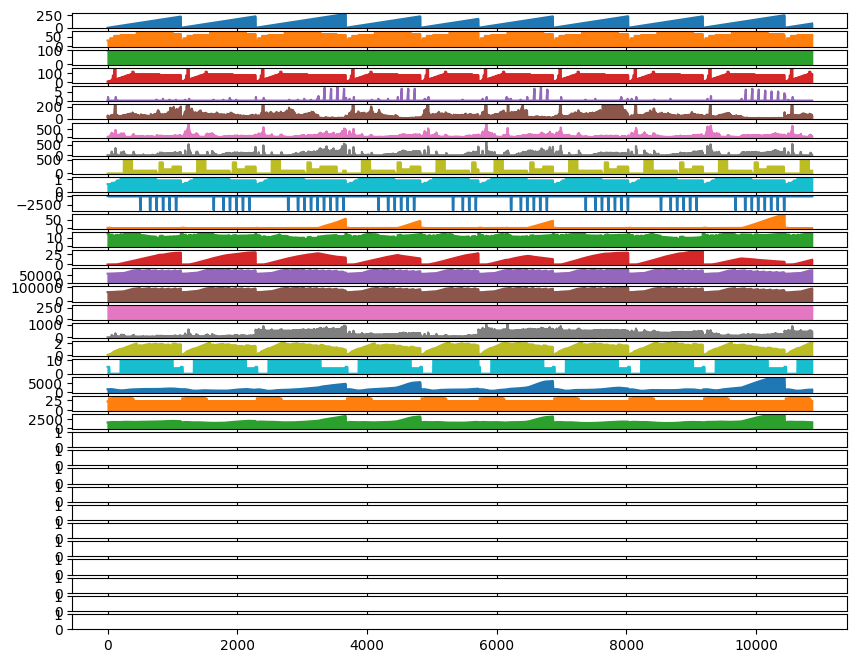

In [ ]:
axs = x_train.plot.area(figsize=(10, 8), subplots=True)
plt.show() #Есть значения, когда идет выделение кислорода (?)

array([[<Axes: title={'center': 'Time (h)'}>,
        <Axes: title={'center': 'Aeration rate(Fg:L/h)'}>,
        <Axes: title={'center': 'Agitator RPM(RPM:RPM)'}>,
        <Axes: title={'center': 'Sugar feed rate(Fs:L/h)'}>,
        <Axes: title={'center': 'Acid flow rate(Fa:L/h)'}>,
        <Axes: title={'center': 'Base flow rate(Fb:L/h)'}>],
       [<Axes: title={'center': 'Heating/cooling water flow rate(Fc:L/h)'}>,
        <Axes: title={'center': 'Heating water flow rate(Fh:L/h)'}>,
        <Axes: title={'center': 'Water for injection/dilution(Fw:L/h)'}>,
        <Axes: title={'center': 'Air head pressure(pressure:bar)'}>,
        <Axes: title={'center': 'Dumped broth flow(Fremoved:L/h)'}>,
        <Axes: title={'center': 'Substrate concentration(S:g/L)'}>],
       [<Axes: title={'center': 'Dissolved oxygen concentration(DO2:mg/L)'}>,
        <Axes: title={'center': 'Penicillin concentration(P:g/L)'}>,
        <Axes: title={'center': 'Vessel Volume(V:L)'}>,
        <Axes: title={'c

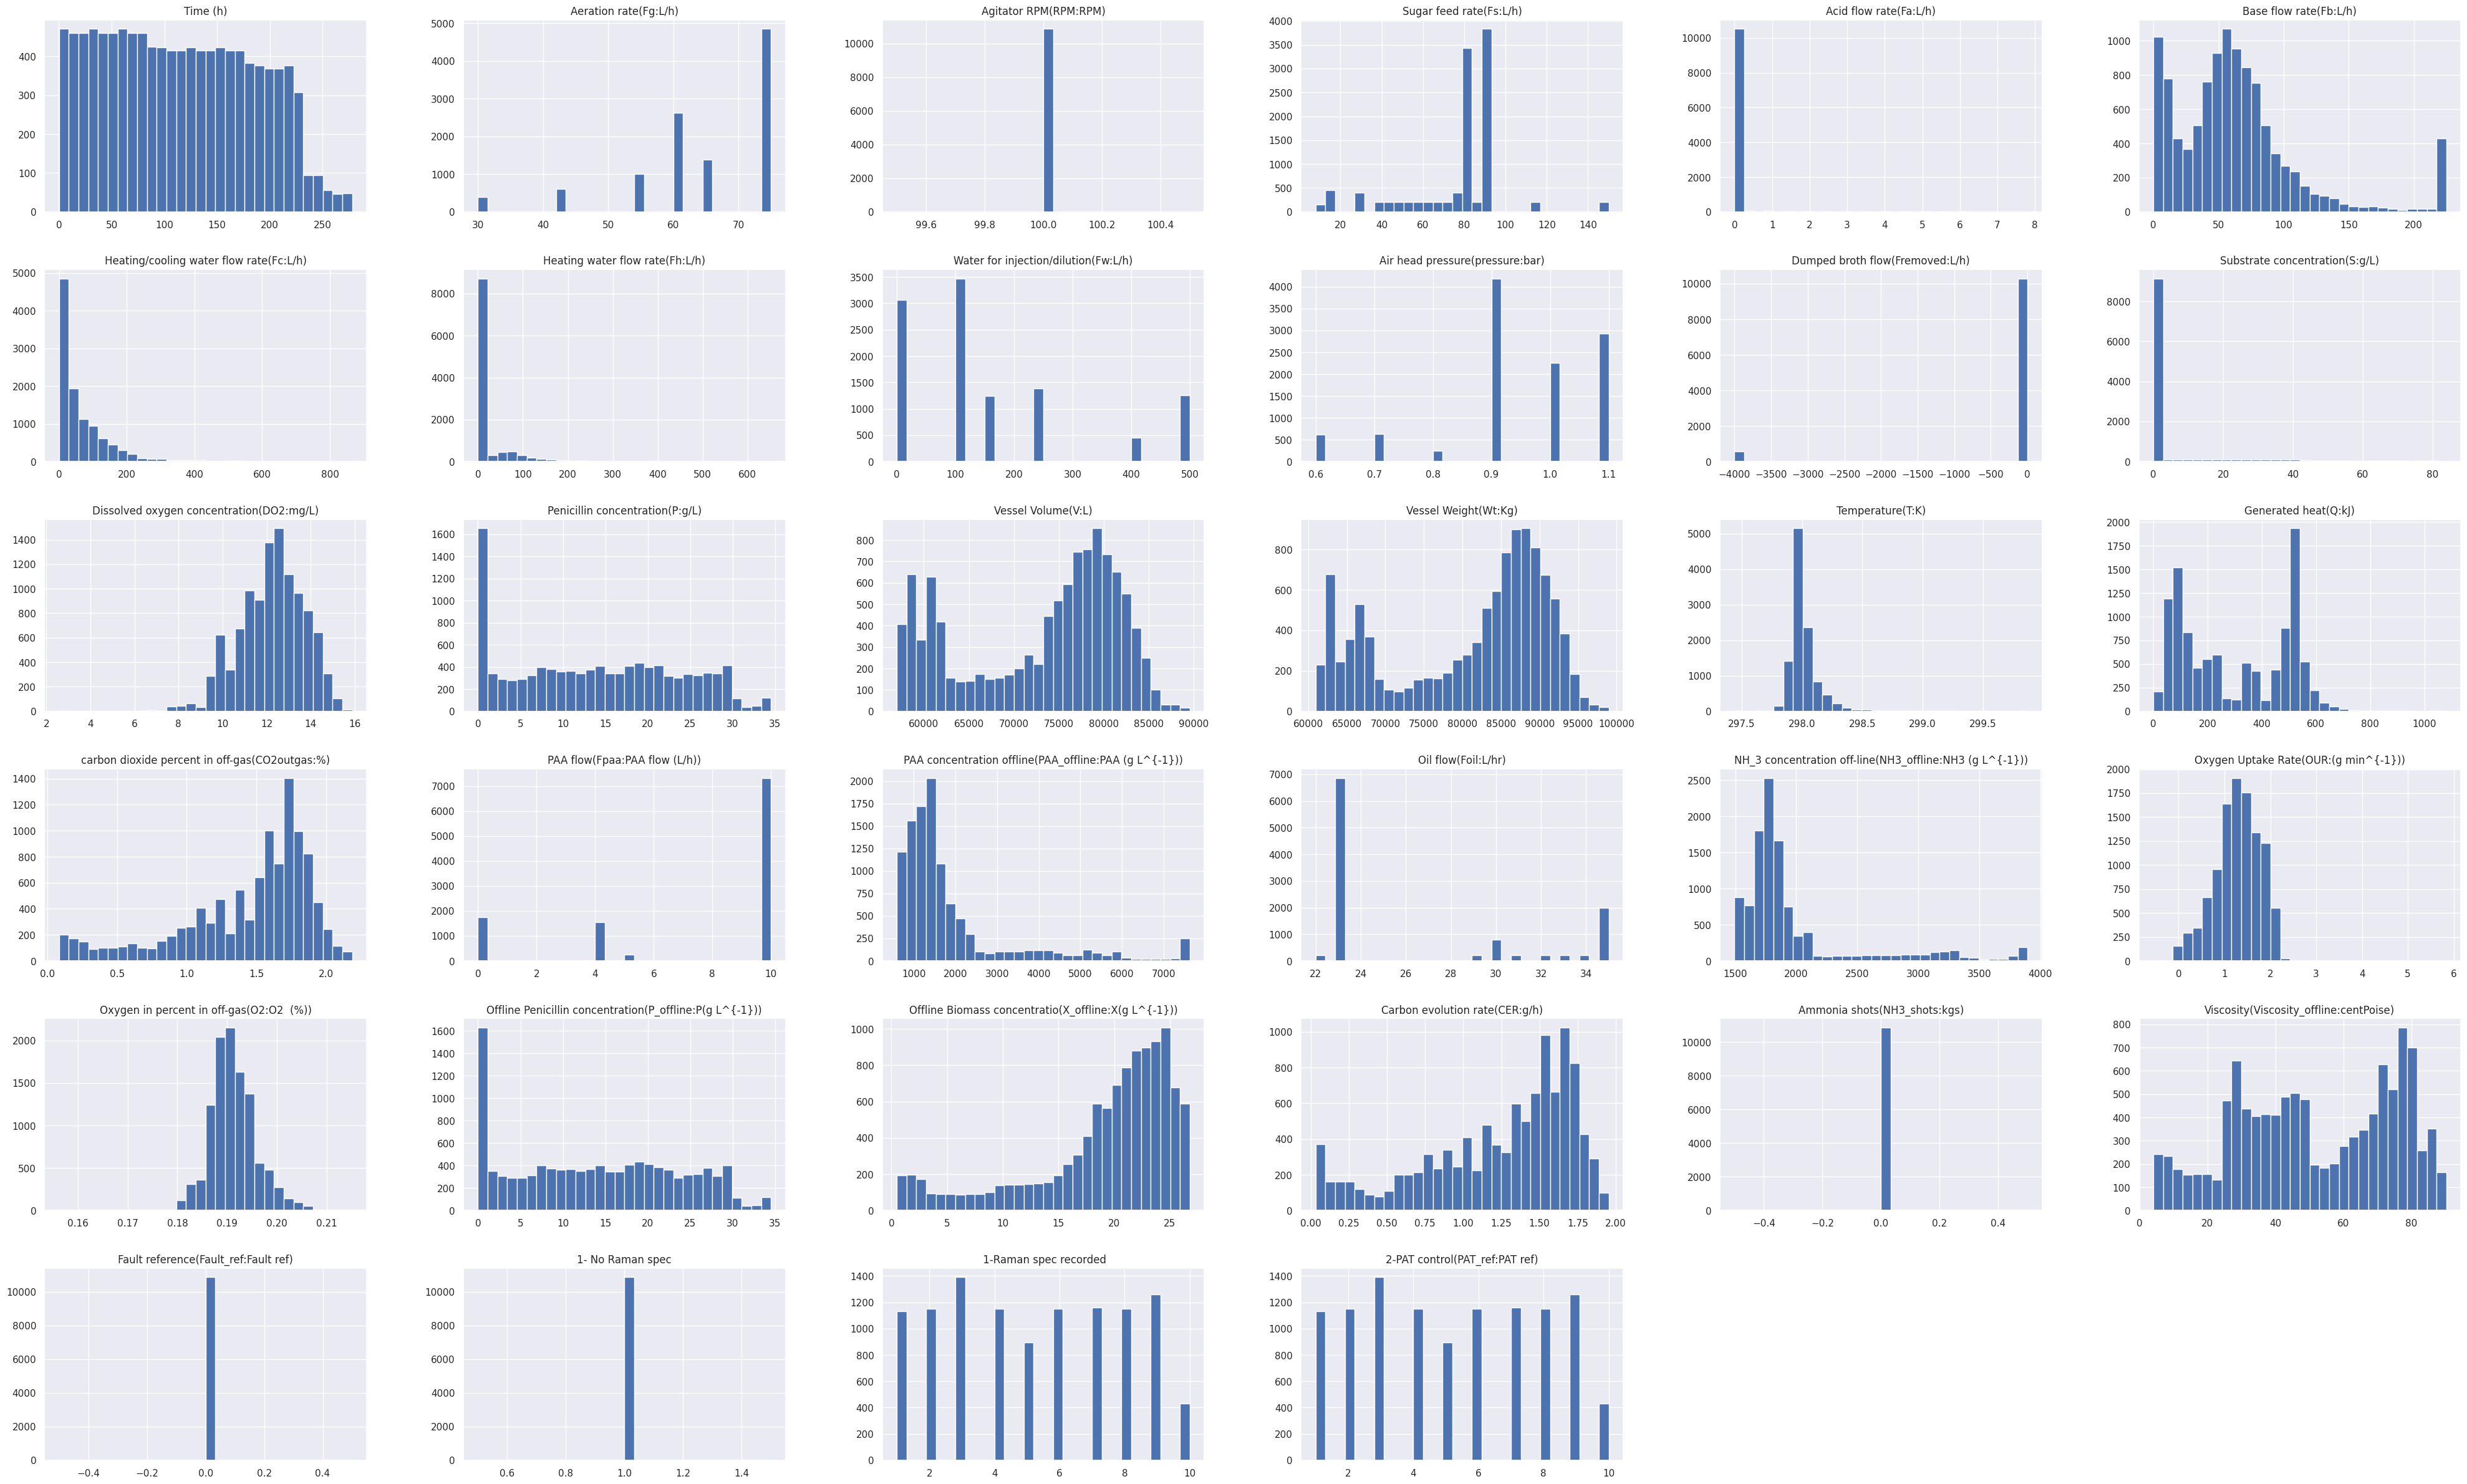

In [ ]:
x_train.hist(bins=30, figsize=(50,30))

Произведем оценку корреляции между признаками. 

In [ ]:
import seaborn as sns

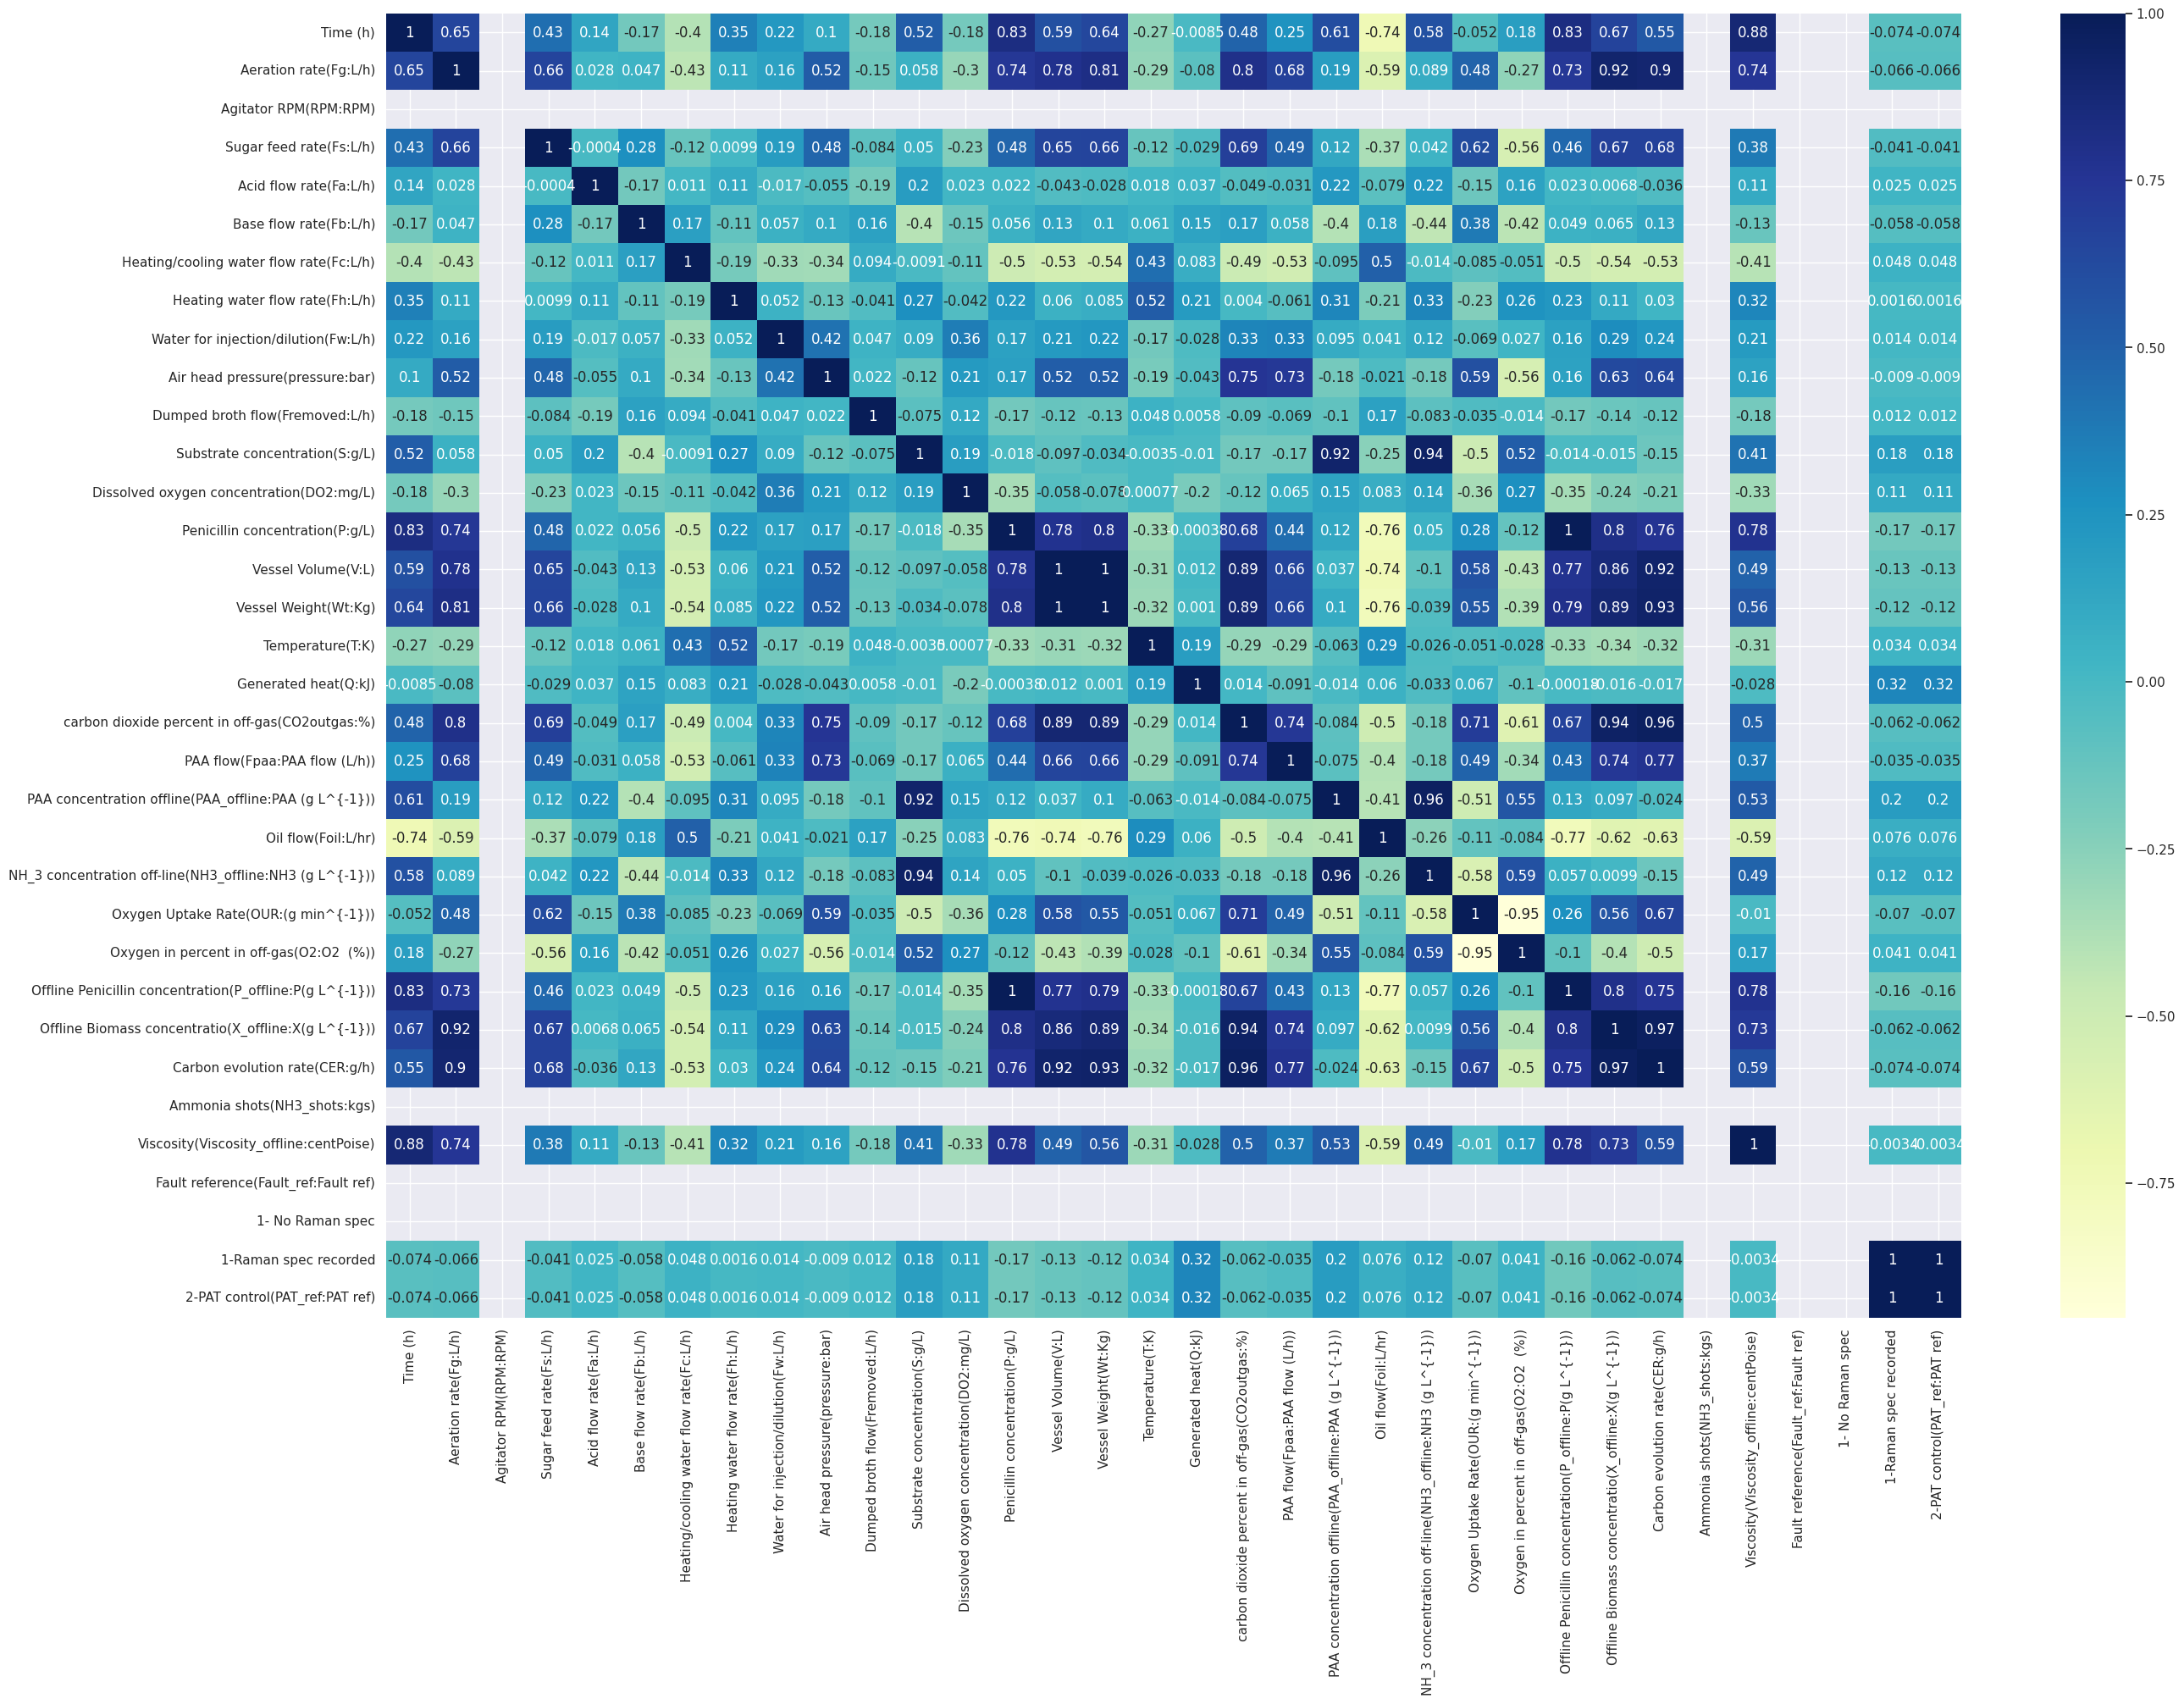

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(30, 20))
dataplot = sns.heatmap(x_train.corr(), cmap="YlGnBu", annot=True)  

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['variable'] = x_train.columns
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,variable
0,256.006425,Time (h)
1,37.139496,Aeration rate(Fg:L/h)
2,0.000000,Agitator RPM(RPM:RPM)
3,4.855027,Sugar feed rate(Fs:L/h)
4,1.135108,Acid flow rate(Fa:L/h)
5,1.914997,Base flow rate(Fb:L/h)
6,3.569654,Heating/cooling water flow rate(Fc:L/h)
7,4.015291,Heating water flow rate(Fh:L/h)
8,2.944429,Water for injection/dilution(Fw:L/h)
9,21.998571,Air head pressure(pressure:bar)


Видим, что значения коэффициента VIF (variance inflation factor) получаются достаточно высокими. Большое значение таких параметров, как концентрации пенициллина, биомассы могут быть обусловлены происхождением данных, постановкой эксперимента, когда методы сбора данных не могут быть четко проконтролированы. Кроме того, такой аспект, как продуктивность, концентрация и выход могут зависеть от множества факторов. 
Были удалены те признаки, которые имеют достаточно высокое значение коэффициента VIF и могут иметь малый вклад в рассчитываемый рН. Например, объем сосуда и время (см. ниже)

In [ ]:
x_train.drop(columns=['1- No Raman spec',' 1-Raman spec recorded','Fault reference(Fault_ref:Fault ref)', 'Carbon evolution rate(CER:g/h)', 'Oxygen Uptake Rate(OUR:(g min^{-1}))', 'Oxygen in percent in off-gas(O2:O2  (%))','Oil flow(Foil:L/hr)', 'Vessel Volume(V:L)', 'Vessel Weight(Wt:Kg)', 'Time (h)', 'Offline Biomass concentratio(X_offline:X(g L^{-1}))' ])

,Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),Dumped broth flow(Fremoved:L/h),...,Temperature(T:K),Generated heat(Q:kJ),carbon dioxide percent in off-gas(CO2outgas:%),PAA flow(Fpaa:PAA flow (L/h)),PAA concentration offline(PAA_offline:PAA (g L^{-1})),NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1})),Offline Penicillin concentration(P_offline:P(g L^{-1})),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),2-PAT control(PAT_ref:PAT ref)
0,30,100,8,0.0000,30.118,9.8335,0.0001,0,0.6,0,...,298.22,0.000001,0.089514,5,1488.0,1667.8,1.017800e-25,0,4.083,1
1,30,100,8,0.0000,51.221,18.1550,0.0001,0,0.6,0,...,298.17,0.000001,0.101760,5,1488.0,1667.8,1.017800e-25,0,4.083,1
2,30,100,8,0.0000,54.302,9.5982,0.0001,0,0.6,0,...,298.14,0.000001,0.105800,5,1488.0,1667.8,1.017800e-25,0,4.083,1
3,30,100,8,0.0000,37.816,4.3395,0.0001,0,0.6,0,...,298.11,0.000001,0.108190,5,1488.0,1667.8,1.017800e-25,0,4.083,1
4,30,100,8,0.5181,18.908,1.1045,0.0001,0,0.6,0,...,298.09,0.000001,0.110300,5,1488.0,1667.8,1.017800e-25,0,4.083,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10858,60,100,90,0.0000,63.673,56.5170,0.0001,100,1.1,0,...,297.98,442.770000,2.095200,10,1290.0,1717.9,1.128700e+01,0,28.306,10
10859,60,100,90,0.0000,59.470,52.5490,0.0001,100,1.1,0,...,297.97,440.260000,2.098500,10,1290.0,1717.9,1.128700e+01,0,28.306,10
10860,60,100,90,0.0000,53.645,49.6080,0.0001,100,1.1,0,...,297.97,439.100000,2.101700,10,1290.0,1717.9,1.128700e+01,0,28.306,10
10861,60,100,90,0.0000,48.495,47.5990,0.0001,100,1.1,0,...,297.97,437.940000,2.104900,10,1290.0,1717.9,1.128700e+01,0,28.306,10


Интерполяция данных в тестовой выборке производилась аналогичным образом

In [ ]:
x_test=x_test.interpolate(method='backfill',columns=x_test.columns)

In [ ]:
x_test=x_test.interpolate(method='linear',columns=x_test.columns)

#Обучение
##Модели линейной регрессии

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred_lr=regr.predict(x_test)


Lasso

In [ ]:
alpha = 0.1
lasso = Lasso(alpha=alpha)
y_pred_lasso = lasso.fit(x_train, y_train).predict(x_test)


ElasticNet

In [ ]:
enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(x_train, y_train).predict(x_test)


##Gradient Boosting Regressor

In [ ]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(x_train, y_train)
reg.predict(x_test)

##Catboost

In [ ]:
model = CatBoostRegressor()
model.fit(x_train, y_train)
y_pred_cat = model.predict(x_test)
print(y_pred_cat)

#Метрики


In [ ]:
y_true=

In [ ]:
mse_lr=mean_squared_error(y_true, y_pred_lr)
print("mean standard error on linear regression", mse_lr)

In [ ]:
mae_lr=mean_absolute_error(y_true, y_pred_lr)
print("mean absolute error on linear regression", mae_lr)

In [ ]:
r2_score_lasso = r2_score(y_true, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

In [ ]:
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

In [ ]:
reg.score(x_test, y_test) ##Gradient boosting regressor

In [ ]:
MSE_catboost=mean_squared_error(y_true, y_pred_cat)


За нехваткой времени не удалось проверить и поработать с выбросами. Необходимо поработать с параметрами моделей, чтобы суметь подобрать наилучшее решение. 